# Exercise 1.3.

In [1]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

Take the function $f(x) = 7.2 - 3.1x + 4.3x^3$. For $100$ equally spaced bins in the interval $(-5, 8)$
add a Gaussian noise (independent in each bin) with respective means 0 and standard deviation $\sigma = 150$ to the data points.

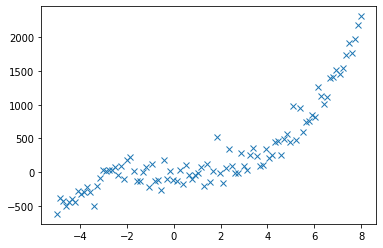

In [2]:
#Setup dataset with specified parameters
sample_size = 100
mean = 0
standard_deviation = 150
noise = np.random.normal(mean,standard_deviation,sample_size)

dataset_x_values = np.linspace(-5, 8, sample_size)
dataset_y_values = 7.2 - 3.1*dataset_x_values + 4.3*dataset_x_values**3 + noise

plt.plot(dataset_x_values, dataset_y_values, 'x')

Now fit polynomials of degree 1, 2, 3, 5, 10 to the entire dataset, using linear regression with ordinary least squares.

In [3]:
# Define a function for fitting and plotting the polynomials

def fit_and_plot_polynomial(degree_of_polynomial, samples_x_values, samples_y_values):
    reshaped_x_values = samples_x_values.reshape(len(samples_x_values),1)
    
    x_values_with_polynomial_features = PolynomialFeatures(degree_of_polynomial).fit_transform(reshaped_x_values)
    fitted_model = linear_model.LinearRegression().fit(x_values_with_polynomial_features, samples_y_values)
    
    plt.plot(samples_x_values, fitted_model.predict(x_values_with_polynomial_features), label='Fit with polynomial of degree {degree}'.format(degree=degree_of_polynomial))
    
def fit_and_plot_polynomials_of_different_degrees(samples_x_values, samples_y_values):

    for degree in [1,2,3,5,10]:
        fit_and_plot_polynomial(degree, samples_x_values, samples_y_values)


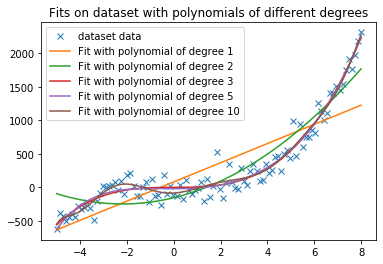

In [4]:
# Fit with polynomials of different degrees
plt.title("Fits on dataset with polynomials of different degrees")
plt.plot(dataset_x_values, dataset_y_values, 'x', label='dataset data')

fit_and_plot_polynomials_of_different_degrees(dataset_x_values, dataset_y_values)

plt.legend()

Repeat the same fitting but with reduced data sets. Visualise your findings and describe the differences? How do they depend on the interval you pick the data from?

In [5]:
# Construct different data sets

new_sample_size = 10
noise = np.random.normal(mean,standard_deviation,new_sample_size)

dataset_with_reduced_sample_size_but_same_intervall_x_values = np.linspace(-5, 8, new_sample_size)
dataset_with_reduced_sample_size_but_same_intervall_y_values = 7.2 - 3.1*dataset_with_reduced_sample_size_but_same_intervall_x_values + 4.3*dataset_with_reduced_sample_size_but_same_intervall_x_values**3 + noise

dataset_x_values_intervall_1 = dataset_x_values[:20]
dataset_y_values_intervall_1 = dataset_y_values[:20]

dataset_x_values_intervall_2 = dataset_x_values[20:40]
dataset_y_values_intervall_2 = dataset_y_values[20:40]

dataset_x_values_intervall_3 = dataset_x_values[40:60]
dataset_y_values_intervall_3 = dataset_y_values[40:60]

dataset_x_values_intervall_4 = dataset_x_values[60:80]
dataset_y_values_intervall_4 = dataset_y_values[60:80]

dataset_x_values_intervall_5 = dataset_x_values[80:]
dataset_y_values_intervall_5 = dataset_y_values[80:]

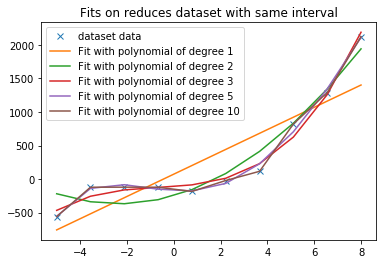

In [6]:
# Plot and fit with polynomials of different degrees and datasets
plt.title("Fits on reduces dataset with same interval")
plt.plot(dataset_with_reduced_sample_size_but_same_intervall_x_values, dataset_with_reduced_sample_size_but_same_intervall_y_values, 'x', label='dataset data')
fit_and_plot_polynomials_of_different_degrees(dataset_with_reduced_sample_size_but_same_intervall_x_values, dataset_with_reduced_sample_size_but_same_intervall_y_values)
plt.legend()


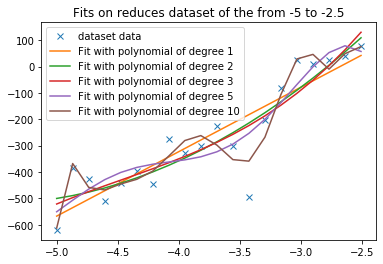

In [7]:
plt.title("Fits on reduces dataset of the from -5 to -2.5")
plt.plot(dataset_x_values_intervall_1, dataset_y_values_intervall_1, 'x', label='dataset data')
fit_and_plot_polynomials_of_different_degrees(dataset_x_values_intervall_1, dataset_y_values_intervall_1)
plt.legend()

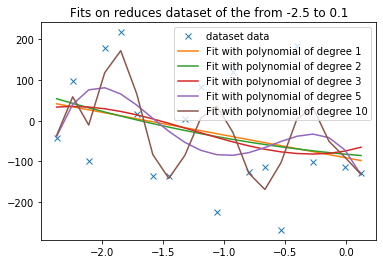

In [8]:
plt.title("Fits on reduces dataset of the from -2.5 to 0.1")
plt.plot(dataset_x_values_intervall_2, dataset_y_values_intervall_2, 'x', label='dataset data')
fit_and_plot_polynomials_of_different_degrees(dataset_x_values_intervall_2, dataset_y_values_intervall_2)
plt.legend()

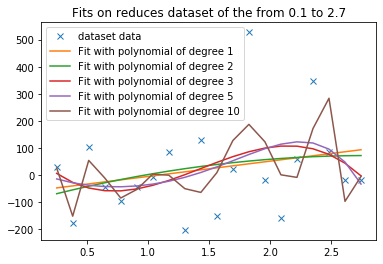

In [9]:
plt.title("Fits on reduces dataset of the from 0.1 to 2.7")
plt.plot(dataset_x_values_intervall_3, dataset_y_values_intervall_3, 'x', label='dataset data')
fit_and_plot_polynomials_of_different_degrees(dataset_x_values_intervall_3, dataset_y_values_intervall_3)
plt.legend()

In [10]:
plt.title("Fits on reduces dataset of the from 2.7 to 5.3")
plt.plot(dataset_x_values_intervall_4, dataset_y_values_intervall_4, 'x', label='dataset data')
fit_and_plot_polynomials_of_different_degrees(dataset_x_values_intervall_4, dataset_y_values_intervall_4)
plt.legend()

In [11]:
plt.title("Fits on reduces dataset of the from 5.3 to 8")
plt.plot(dataset_x_values_intervall_5, dataset_y_values_intervall_5, 'x', label='dataset data')
fit_and_plot_polynomials_of_different_degrees(dataset_x_values_intervall_5, dataset_y_values_intervall_5)
plt.legend()

 With a reduced dataset the polynomial fits are all worse than the first fit with the 100 samples. While it should be noted that the fit with the reduced sample size that covers the interval $(-5,8)$ still resembles the first plot with 100 samples and one can recognize the structure of the objective function $f(x) = 7.2 - 3.1x + 4.3x^3$.
 The other plots that use a subset of the initial dataset which only covered a part of the interval $(-5,8)$ yield significantly worse plots. In these subsequent plots one cannot find any resemblance with the function $f(x) = 7.2 - 3.1x + 4.3x^3$. In conclusion, it is better to use a smaller dataset which still covers a fair range (input-interval) than to use a smaller dataset which only covers a small range.